In [1]:
import numpy as np
import matplotlib.pyplot as plt

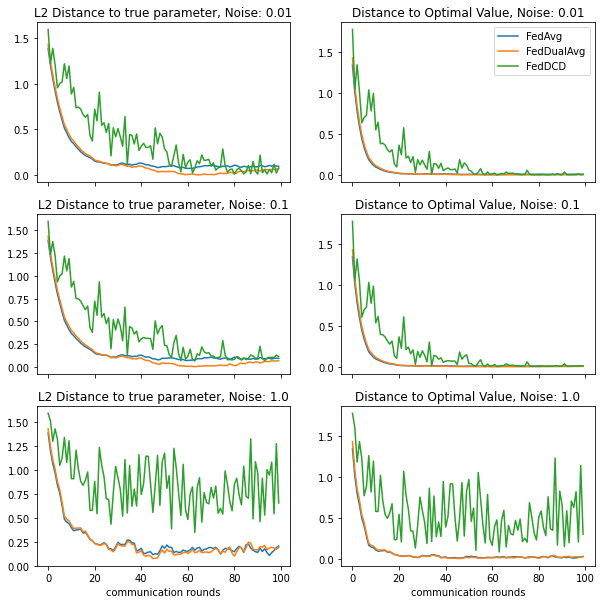

In [24]:
noise_params = [0.01, 0.1, 1.0]
sparsity = 0.5

fig, axs = plt.subplots(len(noise_params), 2, figsize=(10,10), sharex=True)
for i, noise in enumerate(noise_params):
    with open(f'./noise/FedAvg-{sparsity}-{noise}.npy', 'rb') as f:
        param_L1_hist = np.load(f)
        param_L2_hist = np.load(f)
        loss_hist = np.load(f)
        loss_diff_hist= np.load(f)
    axs[i,0].plot(param_L2_hist, label='FedAvg')
    axs[i,1].plot(loss_diff_hist, label='FedAvg')
    
    with open(f'./noise/FedDualAvg-{sparsity}-{noise}.npy', 'rb') as f:
        param_L1_hist = np.load(f)
        param_L2_hist = np.load(f)
        loss_hist = np.load(f)
        loss_diff_hist= np.load(f)
    axs[i,0].plot(param_L2_hist, label='FedDualAvg')
    axs[i,1].plot(loss_diff_hist, label='FedDualAvg')
        
    with open(f'./noise/FedDCD-{sparsity}-{noise}.npy', 'rb') as f:
        param_L1_hist = np.load(f)
        param_L2_hist = np.load(f)
        loss_hist = np.load(f)
        loss_diff_hist= np.load(f)
    axs[i,0].plot(param_L2_hist, label='FedDCD')
    axs[i,1].plot(loss_diff_hist, label='FedDCD')
    
    # Setting plot title
    axs[i,0].set_title(f'L2 Distance to true parameter, Noise: {noise}')
    axs[i,1].set_title(f'Distance to Optimal Value, Noise: {noise}')
    
axs[0,1].legend()
axs[2,0].set_xlabel('communication rounds')
axs[2,1].set_xlabel('communication rounds')
fig.savefig('noise.png')

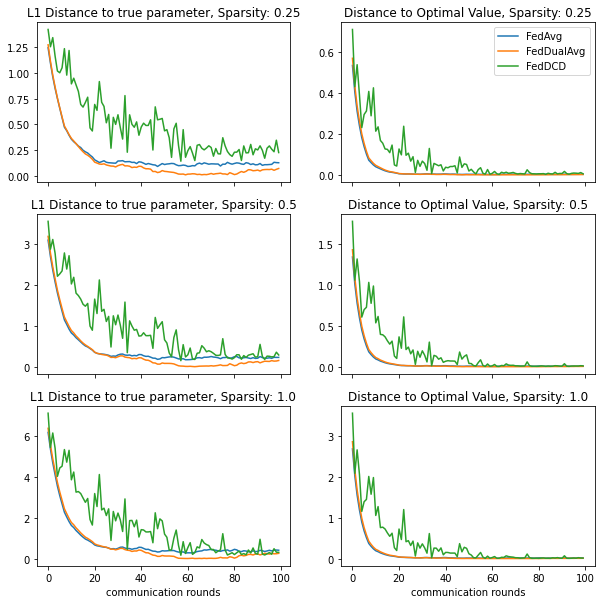

In [25]:
noise = 0.1
sparsity_params = [0.25, 0.5, 1.0]

fig, axs = plt.subplots(len(sparsity_params), 2, figsize=(10,10), sharex=True)
for i, sparsity in enumerate(sparsity_params):
    with open(f'./sparsity/FedAvg-{sparsity}-{noise}.npy', 'rb') as f:
        param_L1_hist = np.load(f)
        param_L2_hist = np.load(f)
        loss_hist = np.load(f)
        loss_diff_hist= np.load(f)
    axs[i,0].plot(param_L1_hist, label='FedAvg')
    axs[i,1].plot(loss_diff_hist, label='FedAvg')
    
    with open(f'./sparsity/FedDualAvg-{sparsity}-{noise}.npy', 'rb') as f:
        param_L1_hist = np.load(f)
        param_L2_hist = np.load(f)
        loss_hist = np.load(f)
        loss_diff_hist= np.load(f)
    axs[i,0].plot(param_L1_hist, label='FedDualAvg')
    axs[i,1].plot(loss_diff_hist, label='FedDualAvg')
        
    with open(f'./sparsity/FedDCD-{sparsity}-{noise}.npy', 'rb') as f:
        param_L1_hist = np.load(f)
        param_L2_hist = np.load(f)
        loss_hist = np.load(f)
        loss_diff_hist= np.load(f)
    axs[i,0].plot(param_L1_hist, label='FedDCD')
    axs[i,1].plot(loss_diff_hist, label='FedDCD')
    
    # Setting plot title
    axs[i,0].set_title(f'L1 Distance to true parameter, Sparsity: {sparsity}')
    axs[i,1].set_title(f'Distance to Optimal Value, Sparsity: {sparsity}')
    
axs[0,1].legend()
axs[2,0].set_xlabel('communication rounds')
axs[2,1].set_xlabel('communication rounds')
fig.savefig('sparsity.png')

[]

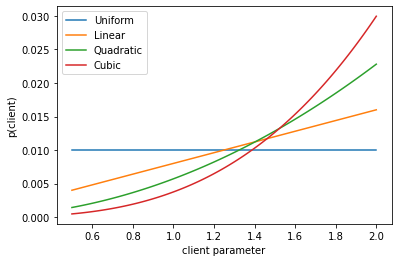

In [70]:
all_clients = np.linspace(0.5, 2, 100)
p0 = all_clients**0/np.sum(all_clients**0)
p1 = all_clients/np.sum(all_clients)
p2 = all_clients**2/np.sum(all_clients**2)
p3 = all_clients**3/np.sum(all_clients**3)
plt.plot(all_clients, p0, label='Uniform')
plt.plot(all_clients, p1, label='Linear')
plt.plot(all_clients, p2, label='Quadratic')
plt.plot(all_clients, p3, label='Cubic')
plt.legend()
plt.xlabel('client parameter')
plt.ylabel('p(client)')
plt.savefig('polynomial.png', dpi=100)
plt.plot()

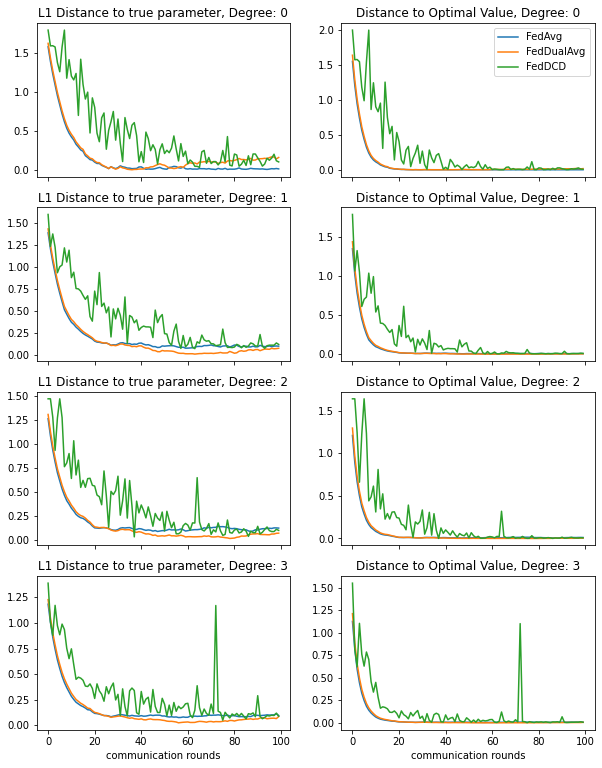

In [45]:
noise = 0.1
sparsity = 0.5
degree_params = [0, 1, 2, 3]

FA_final_L2_params = []
FDA_final_L2_params = []
FDCD_final_L2_params = []
FA_final_loss = []
FDA_final_loss = []
FDCD_final_loss = []

fig, axs = plt.subplots(len(degree_params), 2, figsize=(10,13), sharex=True)
for i, degree in enumerate(degree_params):
    with open(f'./distribution/FedAvg-{degree}-{sparsity}-{noise}.npy', 'rb') as f:
        param_L1_hist = np.load(f)
        param_L2_hist = np.load(f)
        loss_hist = np.load(f)
        loss_diff_hist= np.load(f)
    axs[i,0].plot(param_L2_hist, label='FedAvg')
    axs[i,1].plot(loss_diff_hist, label='FedAvg')
    FA_final_L2_params.append(np.mean(param_L2_hist[:-5]))
    FA_final_loss.append(np.mean(loss_diff_hist[:-5]))
    
    with open(f'./distribution/FedDualAvg-{degree}-{sparsity}-{noise}.npy', 'rb') as f:
        param_L1_hist = np.load(f)
        param_L2_hist = np.load(f)
        loss_hist = np.load(f)
        loss_diff_hist= np.load(f)
    axs[i,0].plot(param_L2_hist, label='FedDualAvg')
    axs[i,1].plot(loss_diff_hist, label='FedDualAvg')
    FDA_final_L2_params.append(np.mean(param_L2_hist[:-5]))
    FDA_final_loss.append(np.mean(loss_diff_hist[:-5]))   
    
    with open(f'./distribution/FedDCD-{degree}-{sparsity}-{noise}.npy', 'rb') as f:
        param_L1_hist = np.load(f)
        param_L2_hist = np.load(f)
        loss_hist = np.load(f)
        loss_diff_hist= np.load(f)
    axs[i,0].plot(param_L2_hist, label='FedDCD')
    axs[i,1].plot(loss_diff_hist, label='FedDCD')
    FDCD_final_L2_params.append(np.mean(param_L2_hist[:-5]))
    FDCD_final_loss.append(np.mean(loss_diff_hist[:-5]))
    
    # Setting plot title
    axs[i,0].set_title(f'L1 Distance to true parameter, Degree: {degree}')
    axs[i,1].set_title(f'Distance to Optimal Value, Degree: {degree}')
    
axs[0,1].legend()
axs[3,0].set_xlabel('communication rounds')
axs[3,1].set_xlabel('communication rounds')
fig.savefig('distribution.png')

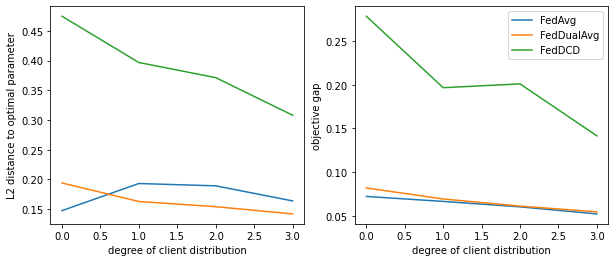

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].plot(degree_params,FA_final_L2_params, label='FedAvg')
axs[0].plot(degree_params,FDA_final_L2_params, label='FedDualAvg')
axs[0].plot(degree_params,FDCD_final_L2_params, label='FedDCD')
axs[0].set_ylabel('L2 distance to optimal parameter')
axs[0].set_xlabel('degree of client distribution')
axs[1].plot(degree_params,FA_final_loss, label='FedAvg')
axs[1].plot(degree_params,FDA_final_loss, label='FedDualAvg')
axs[1].plot(degree_params,FDCD_final_loss, label='FedDCD')
axs[1].set_ylabel('objective gap')
axs[1].set_xlabel('degree of client distribution')
plt.legend()
fig.savefig('distribution_final.png')

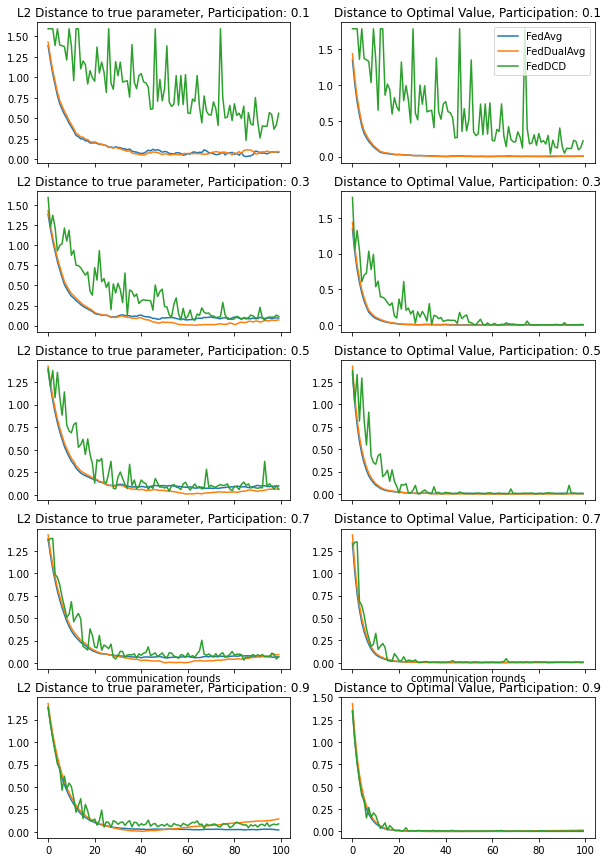

In [67]:
noise = 0.1
sparsity = 0.5
degree = 1
participation_params = [0.1, 0.3, 0.5, 0.7, 0.9]

FA_final_L2_params = []
FDA_final_L2_params = []
FDCD_final_L2_params = []
FA_final_loss = []
FDA_final_loss = []
FDCD_final_loss = []

fig, axs = plt.subplots(len(participation_params), 2, figsize=(10,15), sharex=True)
for i, participation in enumerate(participation_params):
    with open(f'./participation/FedAvg-{degree}-{participation}-{sparsity}-{noise}.npy', 'rb') as f:
        param_L1_hist = np.load(f)
        param_L2_hist = np.load(f)
        loss_hist = np.load(f)
        loss_diff_hist= np.load(f)
    axs[i,0].plot(param_L2_hist, label='FedAvg')
    axs[i,1].plot(loss_diff_hist, label='FedAvg')
    FA_final_L2_params.append(np.mean(param_L2_hist[:-5]))
    FA_final_loss.append(np.mean(loss_diff_hist[:-5]))
    
    with open(f'./participation/FedDualAvg-{degree}-{participation}-{sparsity}-{noise}.npy', 'rb') as f:
        param_L1_hist = np.load(f)
        param_L2_hist = np.load(f)
        loss_hist = np.load(f)
        loss_diff_hist= np.load(f)
    axs[i,0].plot(param_L2_hist, label='FedDualAvg')
    axs[i,1].plot(loss_diff_hist, label='FedDualAvg')
    FDA_final_L2_params.append(np.mean(param_L2_hist[:-5]))
    FDA_final_loss.append(np.mean(loss_diff_hist[:-5]))   
    
    with open(f'./participation/FedDCD-{degree}-{participation}-{sparsity}-{noise}.npy', 'rb') as f:
        param_L1_hist = np.load(f)
        param_L2_hist = np.load(f)
        loss_hist = np.load(f)
        loss_diff_hist= np.load(f)
    axs[i,0].plot(param_L2_hist, label='FedDCD')
    axs[i,1].plot(loss_diff_hist, label='FedDCD')
    FDCD_final_L2_params.append(np.mean(param_L2_hist[:-5]))
    FDCD_final_loss.append(np.mean(loss_diff_hist[:-5]))
    
    # Setting plot title
    axs[i,0].set_title(f'L2 Distance to true parameter, Participation: {participation}')
    axs[i,1].set_title(f'Distance to Optimal Value, Participation: {participation}')
    
axs[0,1].legend()
axs[3,0].set_xlabel('communication rounds')
axs[3,1].set_xlabel('communication rounds')
fig.savefig('participation.png')

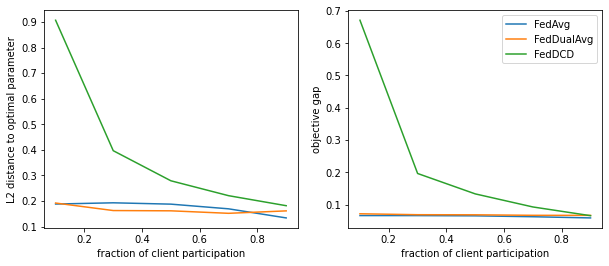

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].plot(participation_params,FA_final_L2_params, label='FedAvg')
axs[0].plot(participation_params,FDA_final_L2_params, label='FedDualAvg')
axs[0].plot(participation_params,FDCD_final_L2_params, label='FedDCD')
axs[0].set_ylabel('L2 distance to optimal parameter')
axs[0].set_xlabel('fraction of client participation')
axs[1].plot(participation_params,FA_final_loss, label='FedAvg')
axs[1].plot(participation_params,FDA_final_loss, label='FedDualAvg')
axs[1].plot(participation_params,FDCD_final_loss, label='FedDCD')
axs[1].set_ylabel('objective gap')
axs[1].set_xlabel('fraction of client participation')
plt.legend()
fig.savefig('participation_final.png')